In [ ]:
#| default_exp baselines

In [ ]:
#| export
import numpy as np
from fastcore.all import *
from scipy.spatial import ConvexHull

# Local convex hull method

The [local convex hull method](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.96.022144) allows us to detect change points in the trajectory. However, it does not provide any information about the properties of the segments.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
points = traj[:2*tau]
hull = ConvexHull(points)

In [ ]:
hull.add_points(np.array([]))

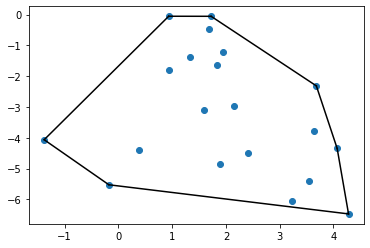

In [ ]:
plt.plot(hull.points[:, 0], hull.points[:, 1], 'o')
for simplex in hull.simplices:
    plt.plot(hull.points[simplex, 0], hull.points[simplex, 1], 'k-')

In [ ]:
hull.max_bound, hull.min_bound

(array([ 4.27969443, -0.05635551]), array([-1.38256934, -6.47143138]))

In [ ]:
hull.vertices

array([ 2, 18, 17, 14, 10, 11,  1], dtype=int32)

In [ ]:
idx0 = np.repeat(hull.vertices, hull.nsimplex)
idx1 = np.tile(hull.vertices, hull.nsimplex)

In [ ]:
diff = hull.points[idx0] - hull.points[idx1] 

In [ ]:
def hull_diameter(hull):
    max_diff = hull.max_bound - hull.min_bound
    return np.sqrt(np.dot(max_diff, max_diff))

In [ ]:
tau = 10
T = 1000; on = 400; off = 600;

np.random.seed(7)
traj = np.random.randn(T, 2)
traj[on:off, :] = traj[on:off, :]*2
traj = traj.cumsum(0)

Sd = np.zeros(traj.shape[0]-2*tau)
Sv = np.zeros(traj.shape[0]-2*tau)

for k in range(traj.shape[0]-2*tau):   
    hull = ConvexHull(traj[k:(k+2*tau)])
    Sd[k] = hull_diameter(hull)
    Sv[k] = hull.volume
    

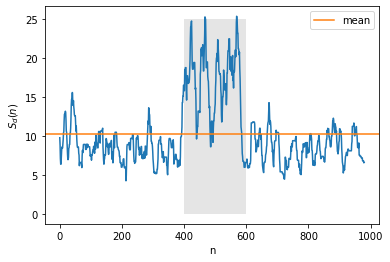

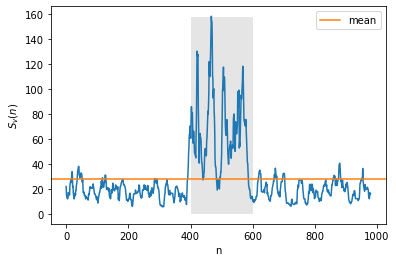

In [ ]:
plt.figure()
plt.plot(Sd)
plt.axhline(Sd.mean(), label='mean', c='C1')
plt.legend()
plt.fill_betweenx(np.arange(Sd.max()), on, off, zorder=-1, alpha=0.1, color='k', lw=0)
plt.xlabel('n'); plt.ylabel(r'$S_d(n)$')

plt.figure()
plt.plot(Sv)
plt.axhline(Sv.mean(), label='mean', c='C1')
plt.legend()
plt.fill_betweenx(np.arange(Sv.max()), on, off, zorder=-1, alpha=0.1, color='k', lw=0)
plt.xlabel('n'); plt.ylabel(r'$S_v(n)$');

# Ruptures

In [ ]:
#| export
import ruptures as rpt

In [ ]:
#| export
@delegates(rpt.KernelCPD)
def ruptures_cp(x, pen=1., **kwargs):
    "Returns the change points of signal array x, excluding the initial and final times."
    alg = rpt.KernelCPD(**kwargs).fit(x)
    return alg.predict(pen=pen)[:-1]